## 4회차: DNN을 활용한 집값 예측을 위한 데이터 전처리 및 데이터 분할

In [ ]:
# 수치 계산을 위한 핵심 라이브러리 (배열, 벡터, 행렬 연산 등)
import numpy as np
# 딥러닝 모델 구축 및 학습을 위한 TensorFlow 프레임워크
import tensorflow as tf
# 데이터 시각화를 위한 라이브러리 (선 그래프, 산점도 등)
import matplotlib.pyplot as plt

# TensorFlow에서 제공하는 Boston 주택 가격 데이터셋 로드
from tensorflow.keras.datasets import boston_housing
# Z-점수 정규화를 위한 전처리 도구 (평균 0, 표준편차 1로 스케일링)
from sklearn.preprocessing import StandardScaler
# 회귀 성능 평가 지표 (평균제곱오차, 평균절대오차 계산용)
from sklearn.metrics import mean_squared_error, mean_absolute_error
# 학습/검증 데이터셋 분할 함수 (train/test 나누기)
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Boston Housing 데이터 로드 (이미 train/test로 나뉘어 있음)
(x_train_full, y_train_full), (x_test, y_test) = boston_housing.load_data()
x_train_full.shape, x_test.shape

((404, 13), (102, 13))

In [ ]:
import pandas as pd

# 피처 이름 수동 입력 (Keras는 컬럼명을 제공하지 않음)
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

# Pandas DataFrame으로 변환
df = pd.DataFrame(x_train_full, columns=feature_names)
df['MEDV'] = y_train_full  # 목표변수 추가
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817,22.395050
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545,9.210442
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000,16.675000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000,20.750000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.B.describe()

,B
count,404.000000
mean,354.783168
std,94.111148
min,0.320000
25%,374.672500
50%,391.250000
75%,396.157500
max,396.900000


In [ ]:
print(df['CHAS'].value_counts())
print(df['RAD'].value_counts().sort_index())

CHAS
0.0    379
1.0     25
Name: count, dtype: int64
RAD
1.0      17
2.0      21
3.0      31
4.0      89
5.0      92
6.0      20
7.0      10
8.0      20
24.0    104
Name: count, dtype: int64


In [ ]:
print(df['ZN'].value_counts().sort_index())

ZN
0.0      300
12.5       6
18.0       1
20.0      16
21.0       4
22.0       5
25.0       9
28.0       3
30.0       5
33.0       3
34.0       2
35.0       3
40.0       5
45.0       5
52.5       2
55.0       2
60.0       3
70.0       3
75.0       3
80.0      12
82.5       2
85.0       2
90.0       3
95.0       4
100.0      1
Name: count, dtype: int64


In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

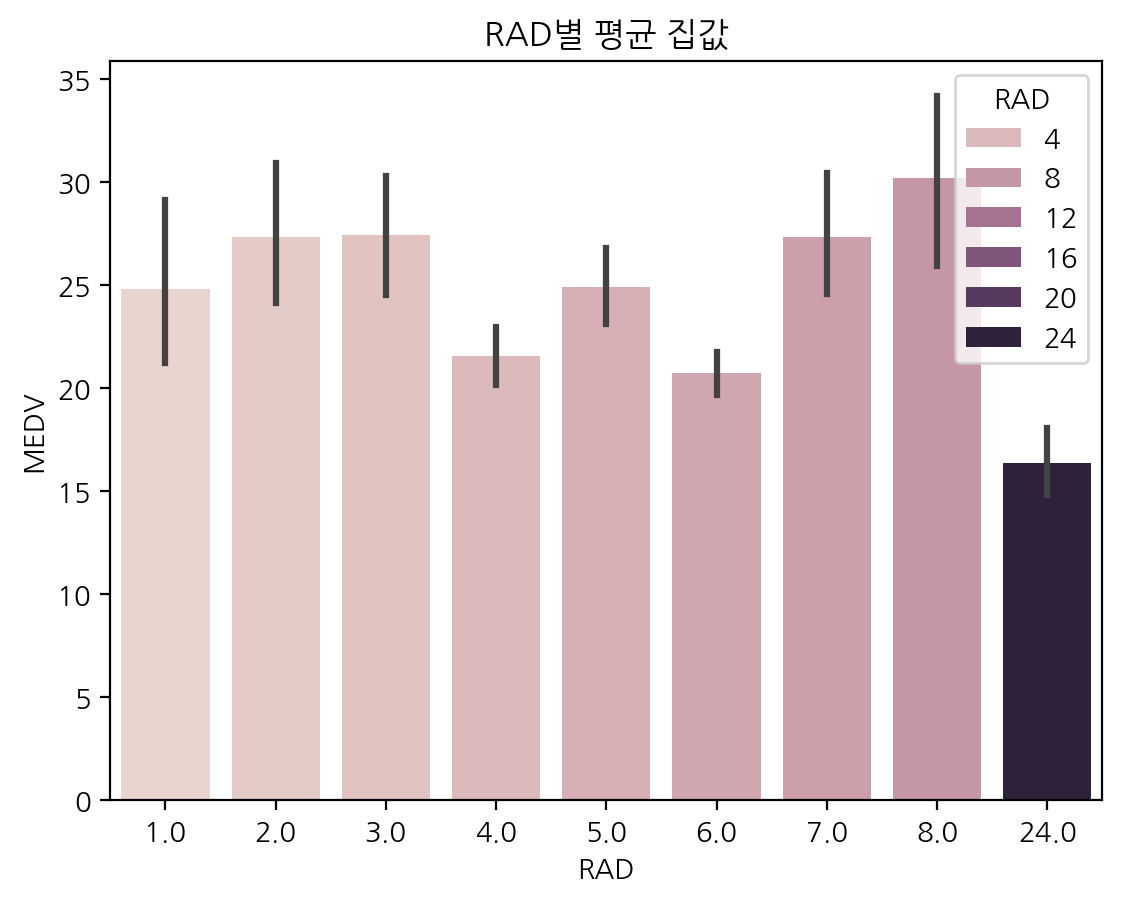

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 생성
(df_x, df_y), _ = boston_housing.load_data()
df = pd.DataFrame(df_x, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
])
df["MEDV"] = df_y

# RAD별 평균 집값 시각화
sns.barplot(x="RAD", y="MEDV", hue='RAD', data=df)
plt.title("RAD별 평균 집값")
plt.show()

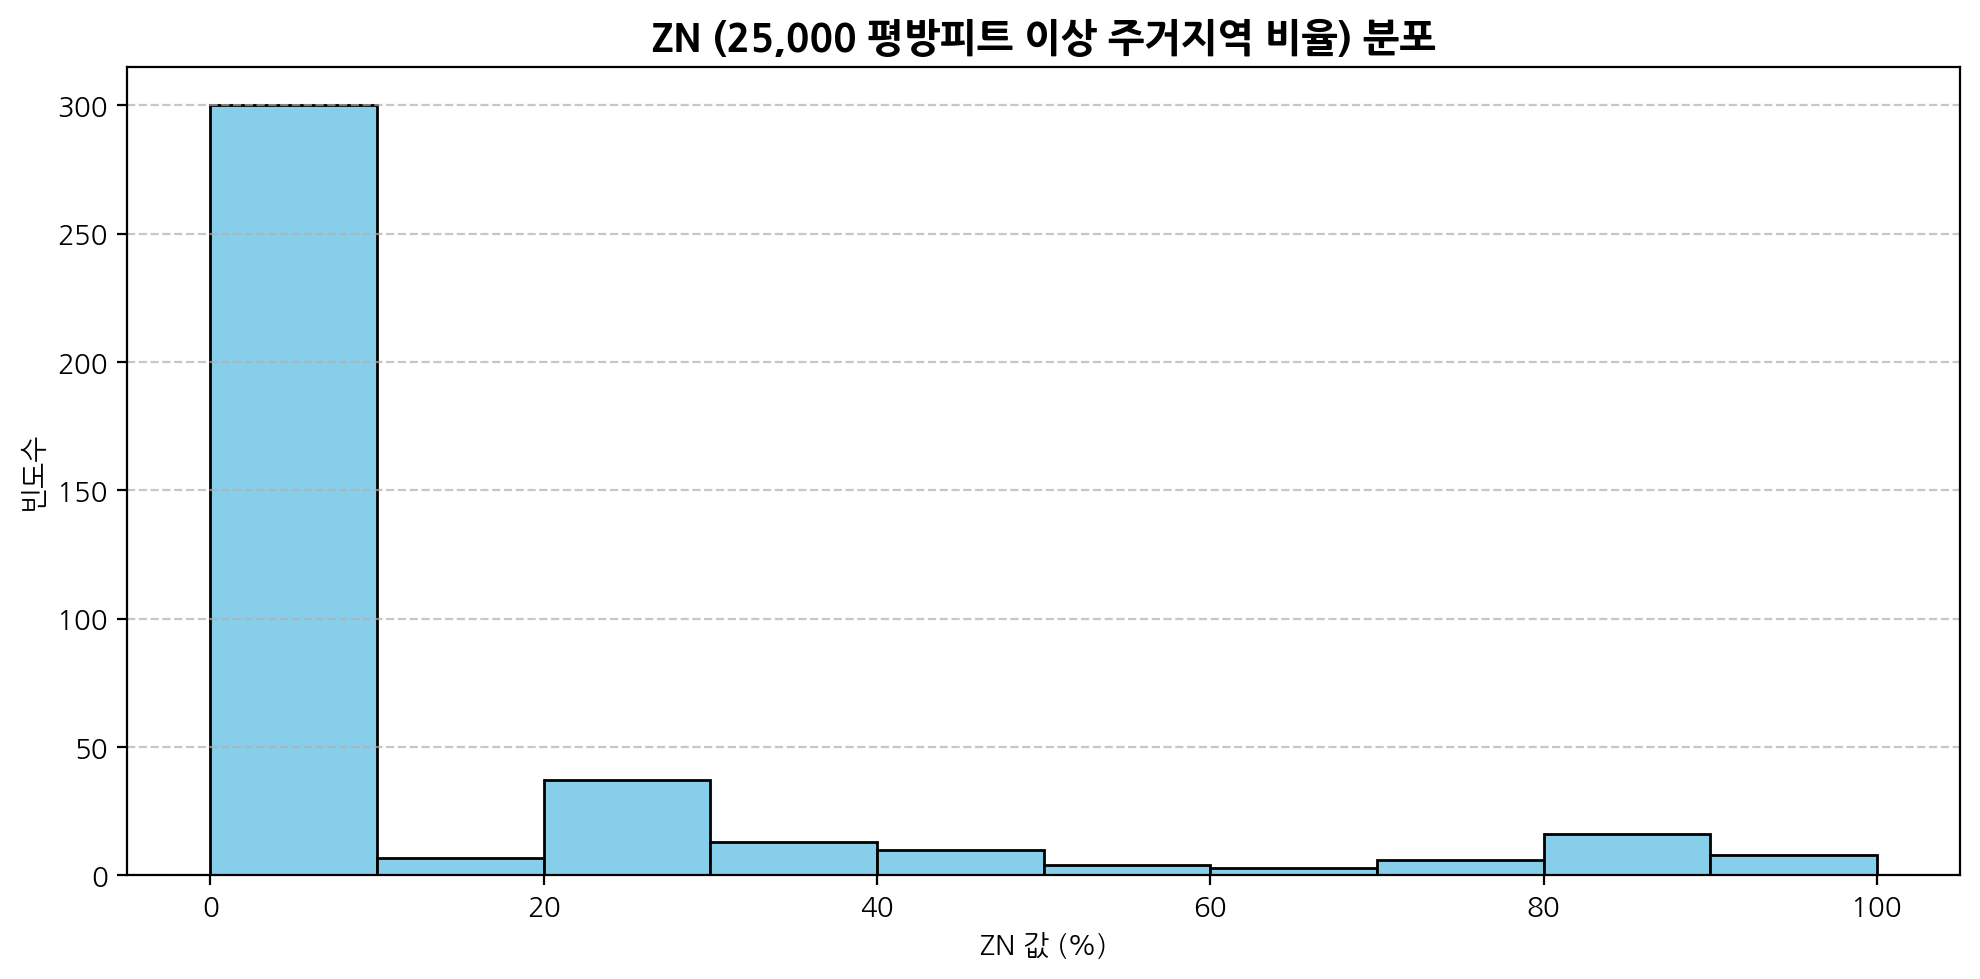

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import boston_housing

# 데이터 로드
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# 컬럼명 정의
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# DataFrame으로 변환
df = pd.DataFrame(x_train, columns=columns)

# ZN 열 시각화
plt.figure(figsize=(10, 5))
plt.hist(df["ZN"], bins=10, color='skyblue', edgecolor='black')
plt.title("ZN (25,000 평방피트 이상 주거지역 비율) 분포", fontsize=14, fontweight='bold')
plt.xlabel("ZN 값 (%)")
plt.ylabel("빈도수")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

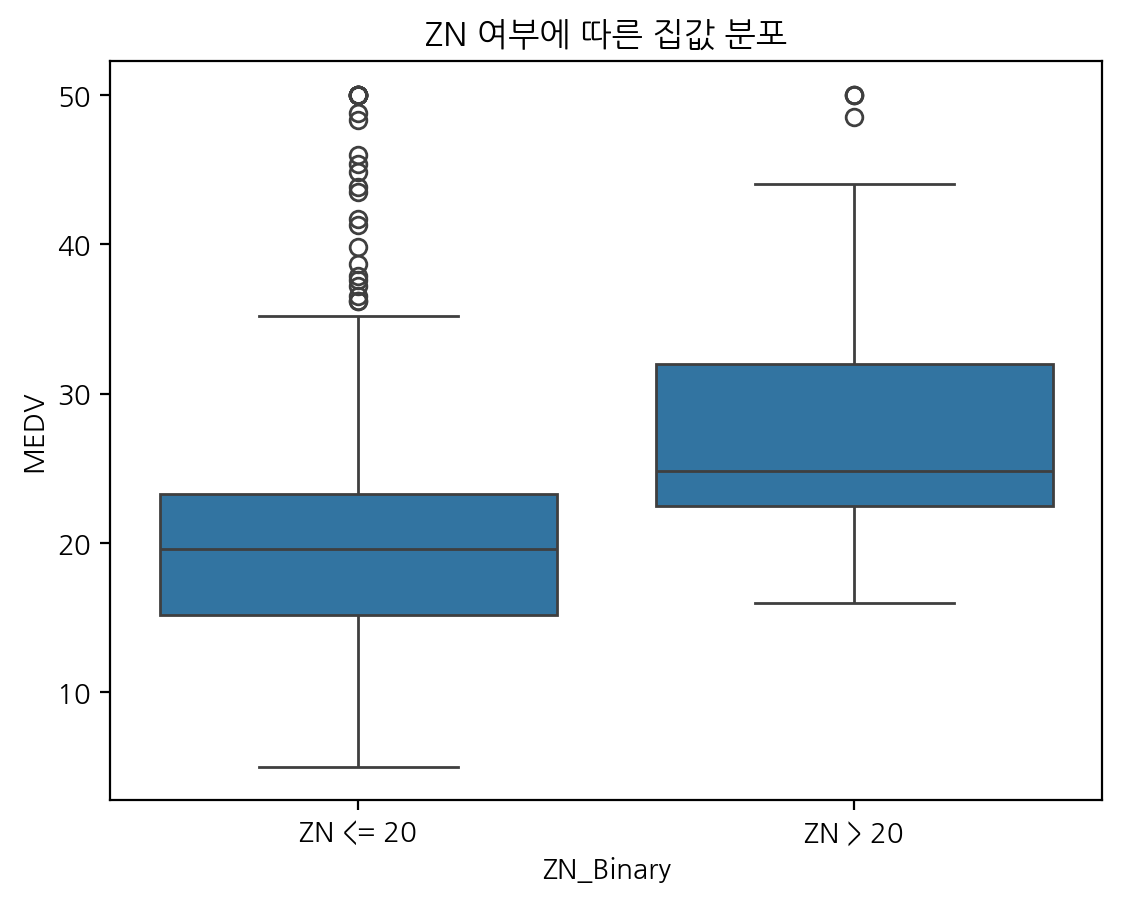

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), _ = boston_housing.load_data()
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(x_train, columns=columns)
df["MEDV"] = y_train

# ZN을 0 vs >0 으로 나눠서 비교
df["ZN_Binary"] = (df["ZN"] > 20).astype(int)

sns.boxplot(x="ZN_Binary", y="MEDV", data=df)
plt.xticks([0,1], ["ZN <= 20", "ZN > 20"])
plt.title("ZN 여부에 따른 집값 분포")
plt.show()

In [ ]:
# Z-점수 정규화를 위한 전처리 도구 (평균 0, 표준편차 1로 스케일링)
from sklearn.preprocessing import StandardScaler

# 2. Z-점수 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_full)
X_test_scaled = scaler.transform(x_test)

print(f"최솟값: {float(X_train_scaled.min()):.2f}")
print(f"최댓값: {float(X_train_scaled.max()):.2f}")
print(f"최솟값: {float(X_test_scaled.min()):.2f}")
print(f"최댓값: {float(X_test_scaled.max()):.2f}")

최솟값: -3.82
최댓값: 9.23
최솟값: -3.51
최댓값: 4.14


In [ ]:
# 학습/검증 데이터셋 분할 함수 (train/test 나누기)
from sklearn.model_selection import train_test_split

# 3. 학습 데이터를 다시 학습/검증으로 분할 (학습:검증 = 80:20)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train_full, test_size=0.2, random_state=42)

print(f'학습 데이터: {X_train.shape}')
print(f'검증 데이터: {X_val.shape}')
print(f'테스트 데이터: {X_test_scaled.shape}')

학습 데이터: (323, 13)
검증 데이터: (81, 13)
테스트 데이터: (102, 13)


### 심화학습

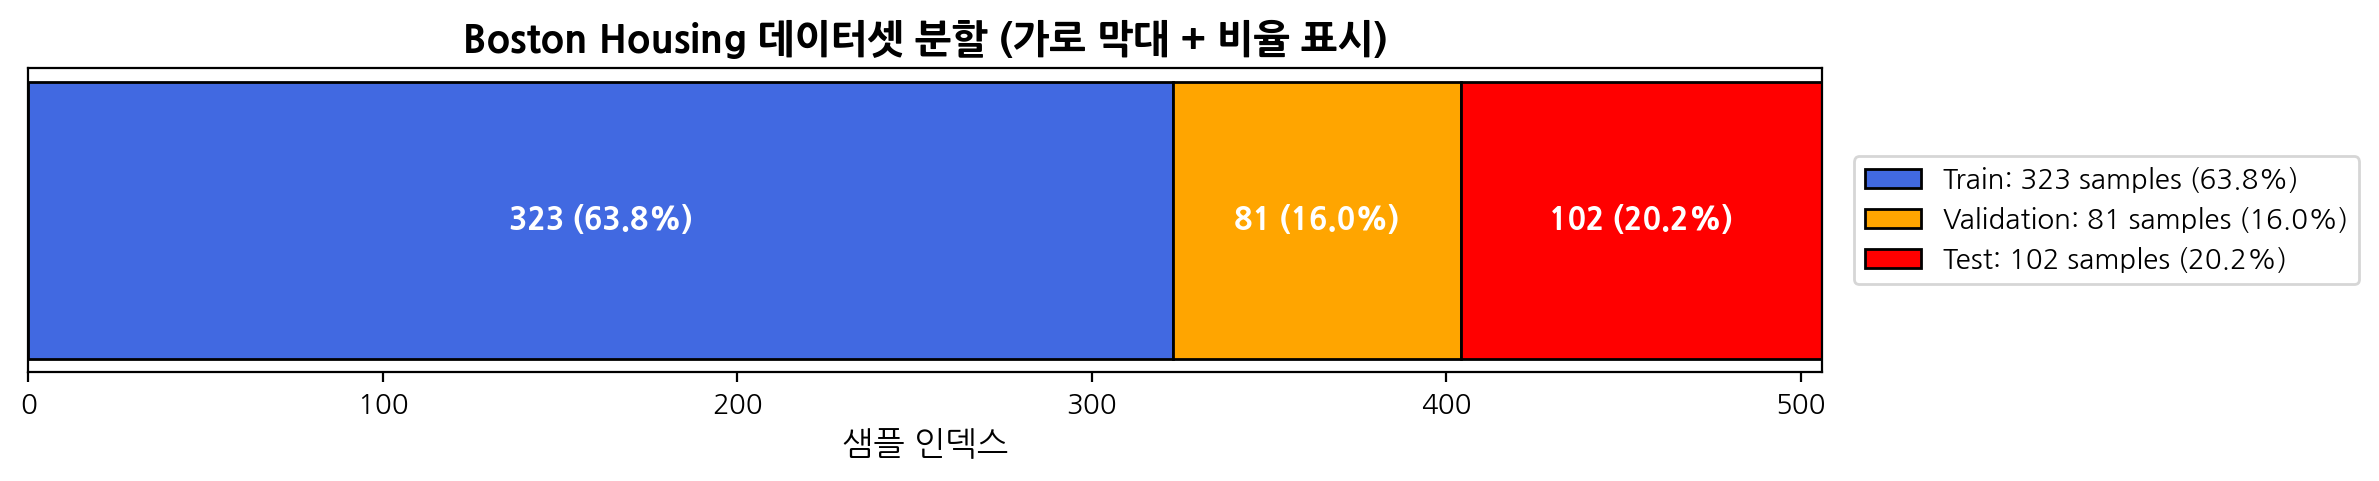

In [ ]:
import matplotlib.pyplot as plt

# 각 데이터셋 크기
train_size = 323
val_size = 81
test_size = 102
total = train_size + val_size + test_size

# 구성
datasets = ['Train', 'Validation', 'Test']
sizes = [train_size, val_size, test_size]
colors = ['royalblue', 'orange', 'red']

# 누적 막대 시작 위치 계산
start = 0
positions = []
for size in sizes:
    positions.append(start)
    start += size

# 시각화
plt.figure(figsize=(12, 2.5))
for i in range(len(sizes)):
    plt.barh(
        y=0, width=sizes[i], left=positions[i],
        color=colors[i], edgecolor='black',
        label=f'{datasets[i]}: {sizes[i]} samples ({sizes[i]/total*100:.1f}%)'
    )
    # 내부 텍스트 (샘플 수 + 비율)
    plt.text(
        positions[i] + sizes[i]/2, 0,
        f"{sizes[i]} ({sizes[i]/total*100:.1f}%)",
        ha='center', va='center',
        color='white', fontsize=11, fontweight='bold'
    )

# 그래프 스타일 설정
plt.title('Boston Housing 데이터셋 분할 (가로 막대 + 비율 표시)', fontsize=14, fontweight='bold')
plt.xlabel('샘플 인덱스', fontsize=12)
plt.yticks([])
plt.xlim(0, total)
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=10, frameon=True)
plt.tight_layout()
plt.show()

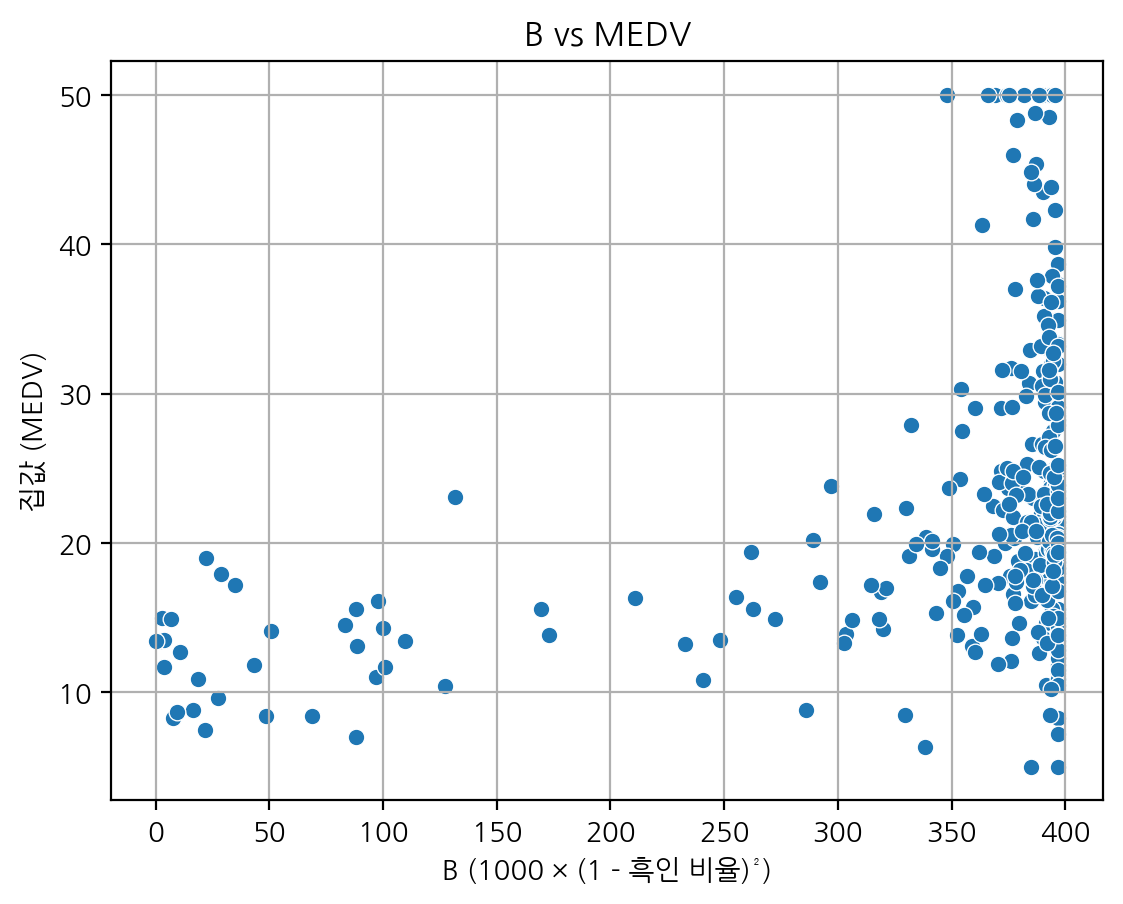

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# B 값과 집값(MEDV) 간의 관계
sns.scatterplot(x=df["B"], y=df["MEDV"])
plt.title("B vs MEDV")
plt.xlabel("B (1000 × (1 - 흑인 비율)²)")
plt.ylabel("집값 (MEDV)")
plt.grid(True)
plt.show()

## 여기부터 5회차 수업

In [ ]:
# 4. DNN 모델 구성 (중간층 3개)
model = tf.keras.models.Sequential([
    # 튜플 형태로 입력 shape 지정
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # 출력층 (회귀)
])

# 5. 컴파일 및 학습
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. 컴파일 및 학습
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)

# 5. 성능 평가 (RMSE, MAE)
y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RMSE: 4.663
MAE: 2.872


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.5 MB/s eta 0:00:00


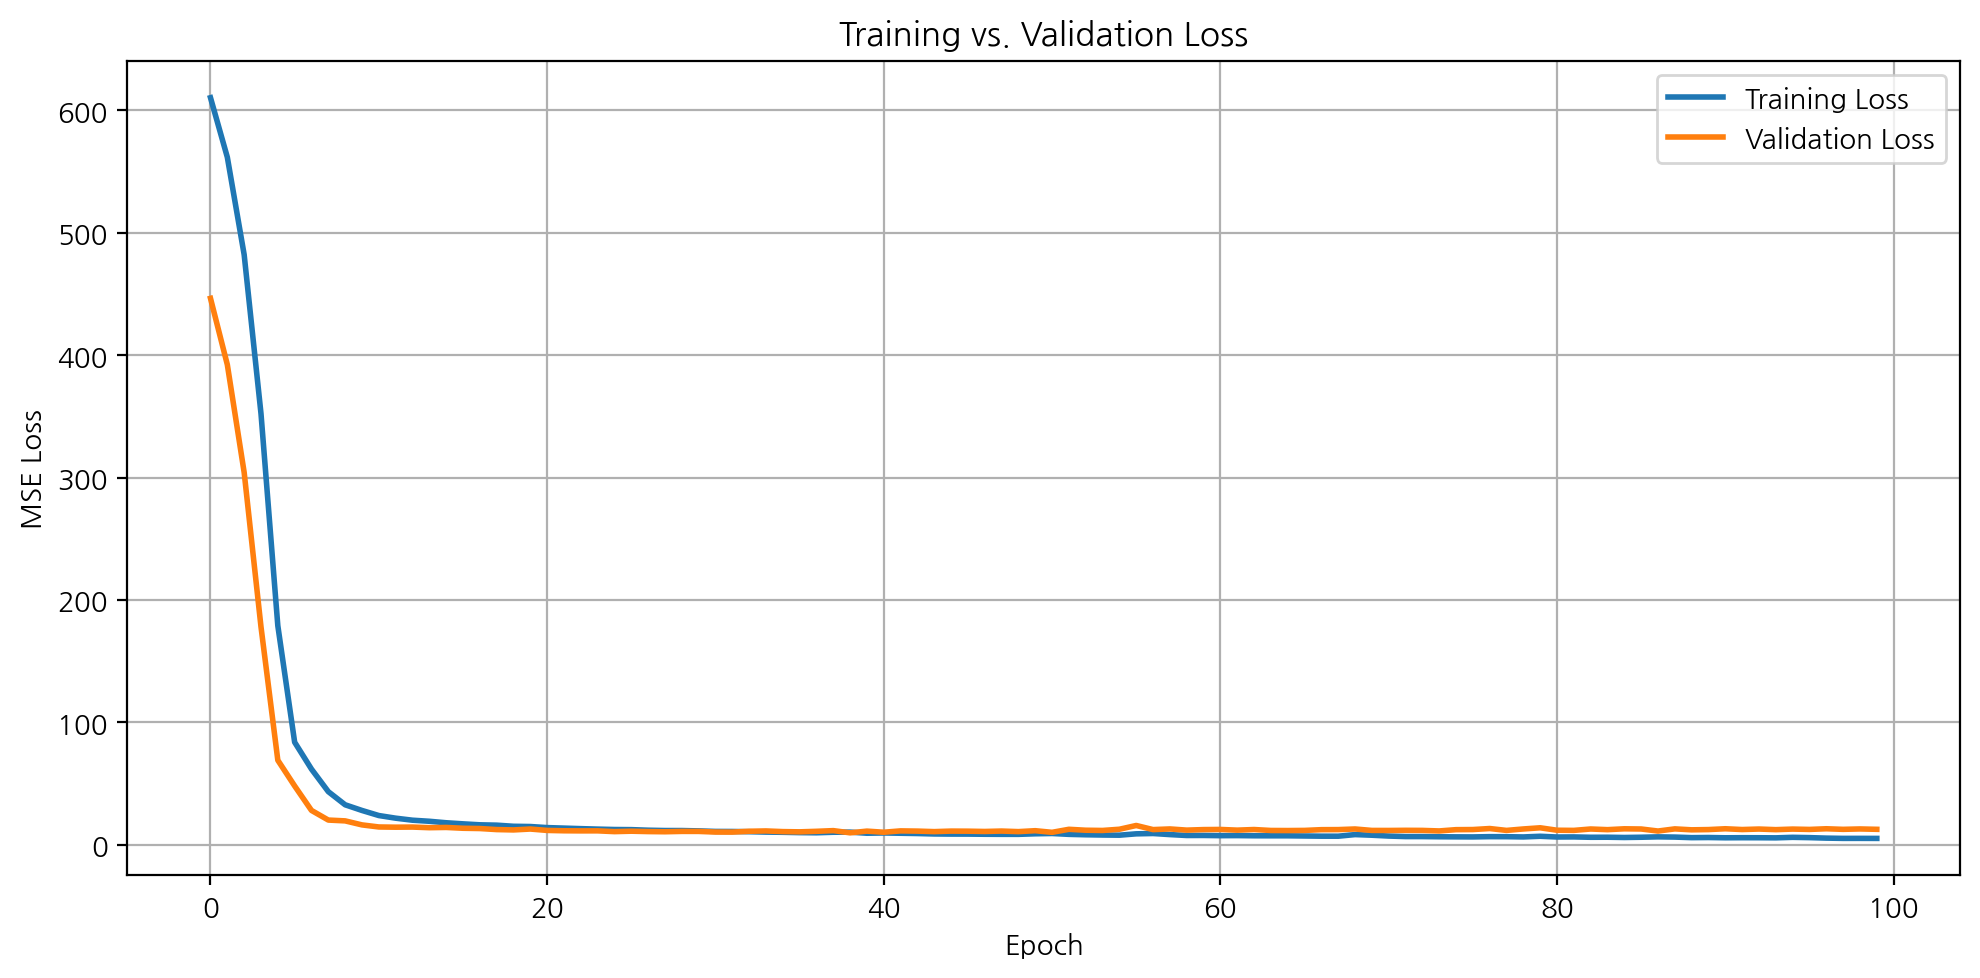

In [ ]:
# 6. 학습/검증 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

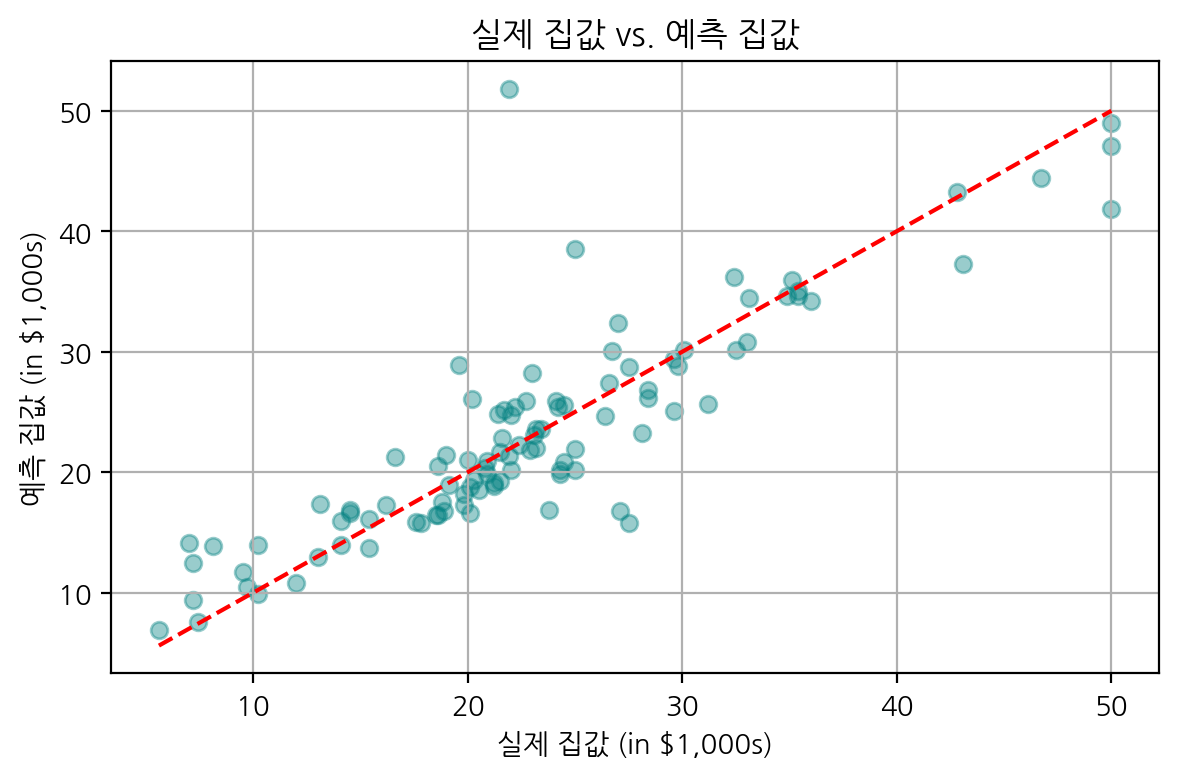

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # y = x 선
plt.xlabel('실제 집값 (in $1,000s)')
plt.ylabel('예측 집값 (in $1,000s)')
plt.title('실제 집값 vs. 예측 집값')
plt.grid(True)
plt.tight_layout()
plt.show()

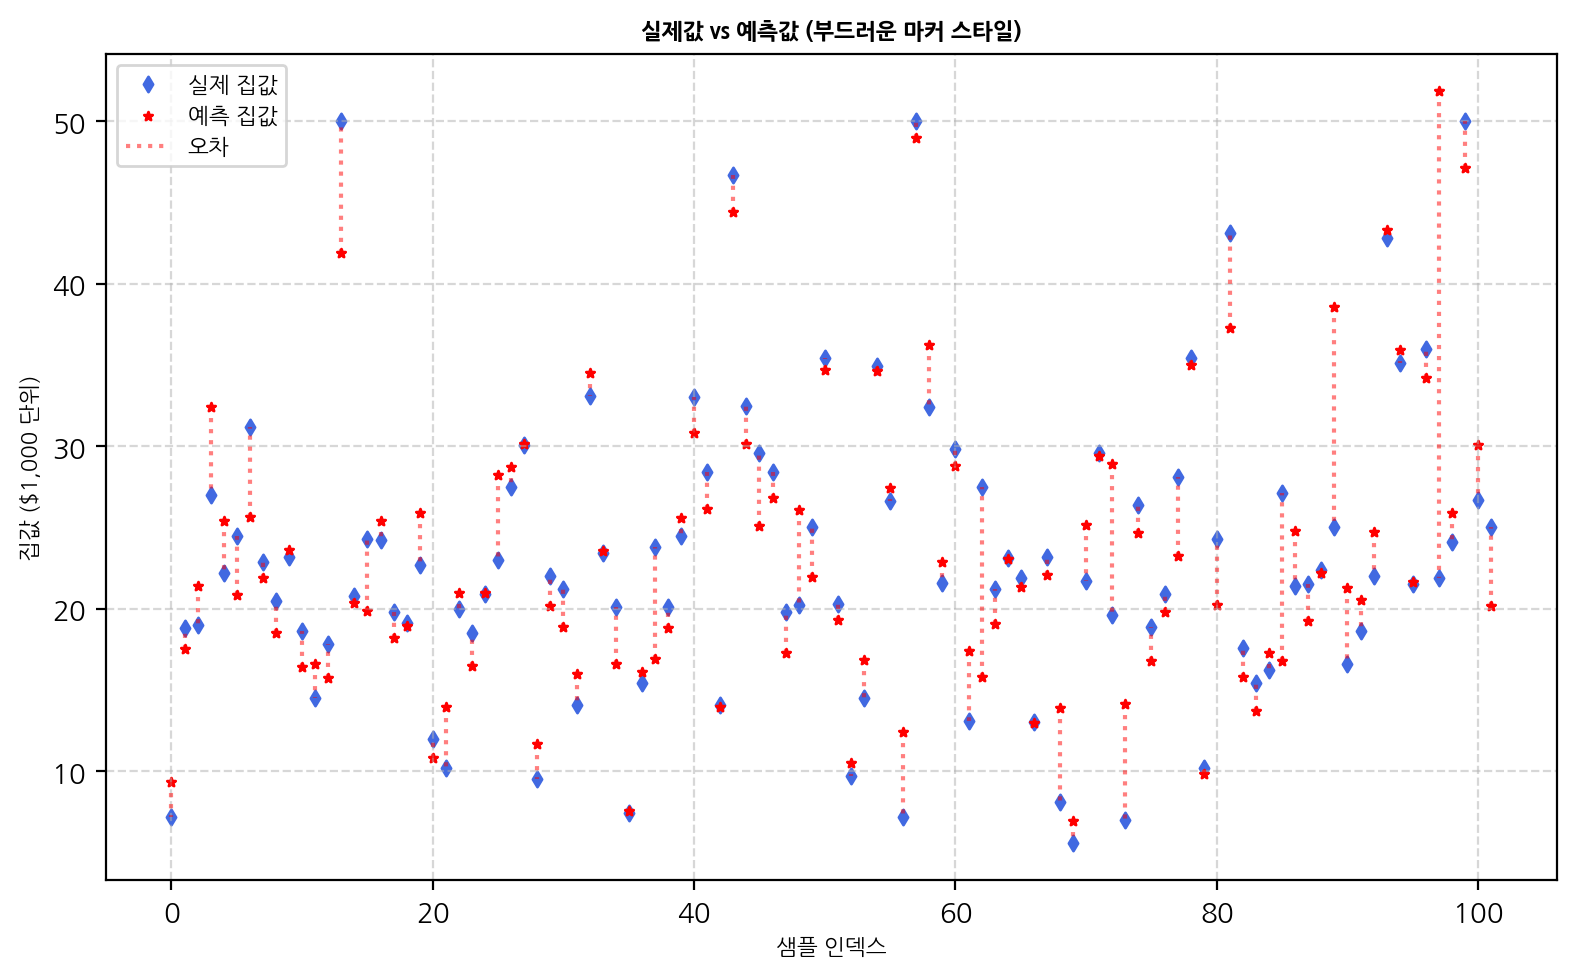

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 오차 계산
errors = np.abs(y_test - y_pred)

# 시각화 시작
plt.figure(figsize=(8, 5))

# 실제값 (다이아몬드 마커, 파란색)
plt.scatter(range(len(y_test)), y_test, label='실제 집값', color='royalblue', marker='d', s=15)

# 예측값 (위쪽 삼각형 마커, 주황색)
plt.scatter(range(len(y_pred)), y_pred, label='예측 집값', color='red', marker='*', s=10)

# 오차 (붉은 점선)
plt.vlines(range(len(y_test)), y_pred, y_test, colors='red', linestyles='dotted', alpha=0.5, label='오차')

# 그래프 설정
plt.xlabel('샘플 인덱스', fontsize=8)
plt.ylabel('집값 ($1,000 단위)', fontsize=8)
plt.title('실제값 vs 예측값 (부드러운 마커 스타일)', fontsize=8, fontweight='bold')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 종료